In this notebook we are going to build a machine learning model that uses deep learning (CNN) to classify hand gestures.

# IMPORTING THE REQUIRED LIBRARIES

In [1]:
#import the required libraries
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.model_selection import train_test_split
import os
import warnings
warnings.simplefilter(action='ignore')
import matplotlib.pyplot as plt

# IMAGE EXTRACTION AND PREPROCESSING

In [2]:
#upload kaggle.json
#from google.colab import files
#files.upload()

In [3]:
#create a directory
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

#download the dataset
#!kaggle datasets download -d gti-upm/leapgestrecog

In [4]:
#upload the dataset to google drive
#!cp /content/leapgestrecog.zip /content/drive/MyDrive/leapgestrecog.zip

#output done upload
#print("Done uploading")

In [5]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#unzip the dataset
#!unzip /content/drive/MyDrive/leapgestrecog.zip -d /content/drive/MyDrive

In [7]:
# list for image path
imagepaths = []

# loop to get all the images
for root, dirs, files in os.walk('/content/drive/MyDrive/leapGestRecog'):
  for file in files:
    path = os.path.join(root, file)
    if file.endswith('.png'): #selects only images
      imagepaths.append(path)

print(len(imagepaths)) #if number > 0 then images was loaded

20000


In [8]:
#function to plot images
def imagePlot(path):
  image = cv2.imread(path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  plt.grid(False)
  plt.title('Image')
  plt.xlabel('Width')
  plt.ylabel('Height')
  plt.imshow(image)
  print(image.shape)

(240, 640)


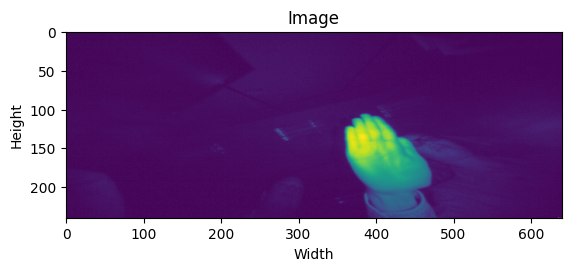

In [9]:
# call the function plot to check images
imagePlot(imagepaths[0])

The images have been loaded and checked. Next we will create empty lists/ arrays for the images and their labels and append the images and labels to these empty lists

In [ ]:
# check the file path to see how to split
#/content/drive/MyDrive/leapGestRecog/00/01_palm/frame_00_01_0001.png split into 5

# create empty lists
images = []
labels = []

# loop to append images
for path in imagepaths:
  image = cv2.imread(path)
  image = cv2.resize(image, (320, 120))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  images.append(image)

  # process images path
  category = path.split('/')[5]
  label = int(category.split('_')[0][1])
  labels.append(label)

# reshape and array conversion
images = np.array(images, dtype="uint8")
images = images.reshape(len(imagepaths), 120, 320, 3)  # Changed 1 to 3 for RGB
labels = np.array(labels)

print(len(images))
print(len(labels))

# CREATING THE MODEL

In [ ]:
# split the date into train and test
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

# construction of the model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(120, 320, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Flatten)
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# compiler the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model
model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=2, validation_data=(X_test, y_test))

In [ ]:
# save the model
model.save('hand_gesture_model.h5')

# EVALUATING THE MODEL

In [ ]:
# evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss * 100} %', )
print(f'Test Accuracy: {accuracy * 100} %' )

In [ ]:
# predict on test set
predictions = model.predict(X_test)

# check the prediction
np.argmax(predictions[0], y_test[0])

In [ ]:
# function to validate predictions
def validate_predictions(predictions_array, true_label_array, img_array):
  # Array for pretty printing and then figure size
  class_names = ["down", "palm", "l", "fist", "fist_moved", "thumb", "index", "ok", "palm_moved", "c"]
  plt.figure(figsize=(15,5))

  for i in range(1, 10):
    # Just assigning variables
    prediction = predictions_array[i]
    true_label = true_label_array[i]
    img = img_array[i]
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    # Plot in a good way
    plt.subplot(3,3,i)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction) # Get index of the predicted label from prediction

    # Change color of title based on good prediction or not
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("Predicted: {} {:2.0f}% (True: {})".format(class_names[p
                                  color=color)
  plt.show()

In [ ]:
validate_predictions(predictions, y_test, X_test)

In [ ]:
'''
From the above we have seen that the model does well in predicting the hand gestures in the image with 99% accuracy.
Clear images without background as well as distinct hand gestures were what influenced the model's prediction.
'''

In [ ]:
# end of notebook